In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
BLS_data = pd.read_csv("BLSDataset_2016.csv")
BLS_data.head()

,area,area_title,area_type,naics,naics_title,own_code,occ code,occ title,group,tot_emp,...,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly,Unnamed: 29
0,99,U.S.,1,0,Cross-industry,1235.0,00-0000,All Occupations,total,"140,400,040",...,28.92,45.45,"19,290","24,140","37,040","60,150","94,540",NaN,NaN,NaN
1,99,U.S.,1,0,Cross-industry,1235.0,11-0000,Management Occupations,major,"7,090,790",...,70.72,#,"47,330","68,630","100,790","147,090",#,NaN,NaN,NaN
2,99,U.S.,1,0,Cross-industry,1235.0,11-1000,Top Executives,minor,"2,465,800",...,78.35,#,"42,810","65,420","102,320","162,970",#,NaN,NaN,NaN
3,99,U.S.,1,0,Cross-industry,1235.0,11-1010,Chief Executives,broad,"223,260",...,#,#,"69,780","114,100","181,210",#,#,NaN,NaN,NaN
4,99,U.S.,1,0,Cross-industry,1235.0,11-1011,Chief Executives,detailed,"223,260",...,#,#,"69,780","114,100","181,210",#,#,NaN,NaN,NaN


In [3]:

US_data = BLS_data[BLS_data["area_type"] == 1]
US_data.drop(["own_code","annual",'Unnamed: 29', "occ code","hourly", "area_type", "area", "naics", "naics_title"], axis = 1, inplace=True)
US_data.dropna(axis=1, inplace=True)

State_data = BLS_data[( BLS_data["area_type"] == 2) & ( BLS_data["area_title"] != "District of Columbia")]
State_data.drop(["own_code","annual",'Unnamed: 29', "occ code","hourly", "area_type", "area", "naics", "naics_title"], axis = 1, inplace=True)
State_data.dropna(axis=1, inplace=True)

US_data.head()
State_data.head()

,area_title,occ title,group,tot_emp,emp_prse,jobs_1000,loc_quotient,h_mean,a_mean,mean_prse,h_pct10,h_pct25,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90
184559,Alabama,All Occupations,total,"1,912,990",0.4,1000.000,1.00,20.44,"42,510",0.5,8.45,10.19,15.43,24.70,37.40,"17,580","21,200","32,100","51,370","77,780"
184560,Alaska,All Occupations,total,"323,500",0.9,1000.000,1.00,27.26,"56,710",0.7,11.01,15.00,22.68,34.52,48.24,"22,900","31,200","47,170","71,800","100,340"
184561,Arizona,All Occupations,total,"2,652,990",0.7,1000.000,1.00,22.26,"46,290",0.7,9.10,11.37,17.05,27.03,41.19,"18,940","23,640","35,470","56,210","85,680"
184562,Arkansas,All Occupations,total,"1,191,320",0.7,1000.000,1.00,19.03,"39,590",1.5,8.67,9.87,14.48,22.64,33.59,"18,030","20,540","30,130","47,080","69,860"
184563,California,All Occupations,total,"15,966,580",0.2,1000.000,1.00,27.33,"56,840",0.4,10.30,12.45,19.67,33.84,54.17,"21,420","25,910","40,920","70,380","112,670"


In [4]:
US_data_avg = US_data[US_data["group"] == "major"]
US_data_avg .drop_duplicates(["occ title"], keep="first", inplace=True) 
US_data_avg [' a_mean '] = US_data_avg [' a_mean '].str.replace(',', '')  #remove comma in numbers
US_data_avg [' a_mean '] = US_data_avg [' a_mean '].str.replace('*', '0')
US_data_avg [' a_mean '] = US_data_avg [' a_mean '].astype(int)           #convert string to integers
US_data_avg .sort_values(" a_mean ", ascending = False, inplace=True)
US_data_avg [["occ title", " a_mean "]].head(10)

,occ title,a_mean
1,Management Occupations,118020
319,Legal Occupations,105980
128,Computer and Mathematical Occupations,87880
161,Architecture and Engineering Occupations,84300
493,Healthcare Practitioners and Technical Occupat...,79160
70,Business and Financial Operations Occupations,75070
221,"Life, Physical, and Social Science Occupations",72930
431,"Arts, Design, Entertainment, Sports, and Media...",58390
335,"Education, Training, and Library Occupations",54520
949,Construction and Extraction Occupations,48900


In [27]:
State_employment_rate = State_data[State_data["group"] == "total"]
State_employment_rate["tot_emp"] = State_employment_rate['tot_emp'].str.replace(',', '')  #remove comma in numbers
State_employment_rate["tot_emp"] = State_employment_rate["tot_emp"].astype(int)  
State_employment_rate.sort_values("tot_emp", ascending=False, inplace=True)
State_employment_rate[["area_title", "tot_emp"]].head()

,area_title,tot_emp
184563,California,15966580
184602,Texas,11745250
184591,New York,9097650
184568,Florida,8222030
184572,Illinois,5903820


In [6]:
#State Average Annual Income
State_avg_income= State_data[State_data["group"] == "total"]
State_avg_income[" a_mean "] = State_avg_income[' a_mean '].str.replace(',', '')  #remove comma in numbers
State_avg_income[" a_mean "] = State_avg_income[" a_mean "].astype(int)     
State_avg_income.sort_values(" a_mean ", ascending=False, inplace=True)
State_avg_income[["area_title", " a_mean "]].head(10)

,area_title,a_mean
184580,Massachusetts,60840
184591,New York,58910
184565,Connecticut,57960
184563,California,56840
184560,Alaska,56710
184579,Maryland,56120
184589,New Jersey,56030
184606,Washington,55810
184605,Virginia,53090
184564,Colorado,52710


In [7]:
#California Occupation with the highest average annual income
CA_data = State_data[(State_data["area_title"] == "California") & (State_data["group"] == "major")] 
CA_data[' a_mean '] = CA_data[' a_mean '].str.replace(',', '') 
CA_data = CA_data[CA_data[' a_mean '] != "*"]                  # remove N/A observations
CA_data[' a_mean '] = CA_data[' a_mean '].astype(int)          
CA_data.sort_values(" a_mean ", ascending=False, inplace=True)
CA_data[["occ title", " a_mean "]].head(10)

,occ title,a_mean
184614,Management Occupations,130200
192940,Legal Occupations,125150
187893,Computer and Mathematical Occupations,102970
188761,Architecture and Engineering Occupations,98370
198039,Healthcare Practitioners and Technical Occupat...,94480
186316,Business and Financial Operations Occupations,82910
190316,"Life, Physical, and Social Science Occupations",80960
196296,"Arts, Design, Entertainment, Sports, and Media...",74610
193398,"Education, Training, and Library Occupations",61890
201825,Protective Service Occupations,56810


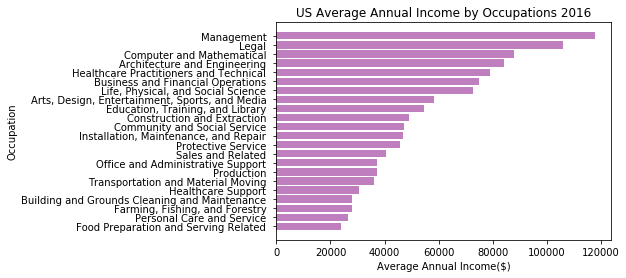

<Figure size 7200x7200 with 0 Axes>

In [36]:

fig, ax = plt.subplots()

# Example data
plt.figure(figsize=(100, 100))
US_avg_inc_byocc = np.arange(len(US_data_avg[' a_mean ']))
yticks = US_data_avg['occ title'].str.replace('Occupations', '')

ax.barh(US_avg_inc_byocc, US_data_avg[' a_mean '], color = "purple", alpha = .5)
ax.set_yticks(y_pos)
ax.set_yticklabels(yticks)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Annual Income($)')
ax.set_ylabel('Occupation')
ax.set_title('US Average Annual Income by Occupations 2016')

plt.show()

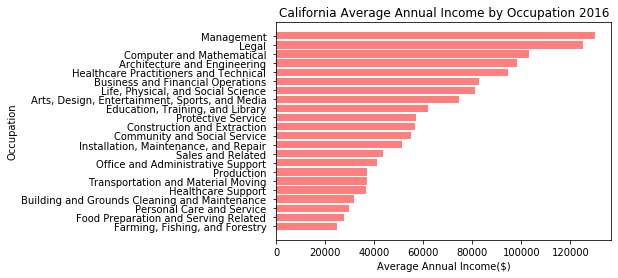

<Figure size 14400x14400 with 0 Axes>

In [8]:

fig, ax = plt.subplots()

# Example data
plt.figure(figsize=(200, 200))
CA_Avg_income = np.arange(len(CA_data[' a_mean ']))
yticks = CA_data['occ title'].str.replace('Occupations', '')

ax.barh(CA_Avg_income, CA_data[' a_mean '], color = "red", alpha = .5)
ax.set_yticks(CA_Avg_income)
ax.set_yticklabels(yticks)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Annual Income($)')
ax.set_ylabel('Occupation')
ax.set_title('California Average Annual Income by Occupation 2016')

plt.show()

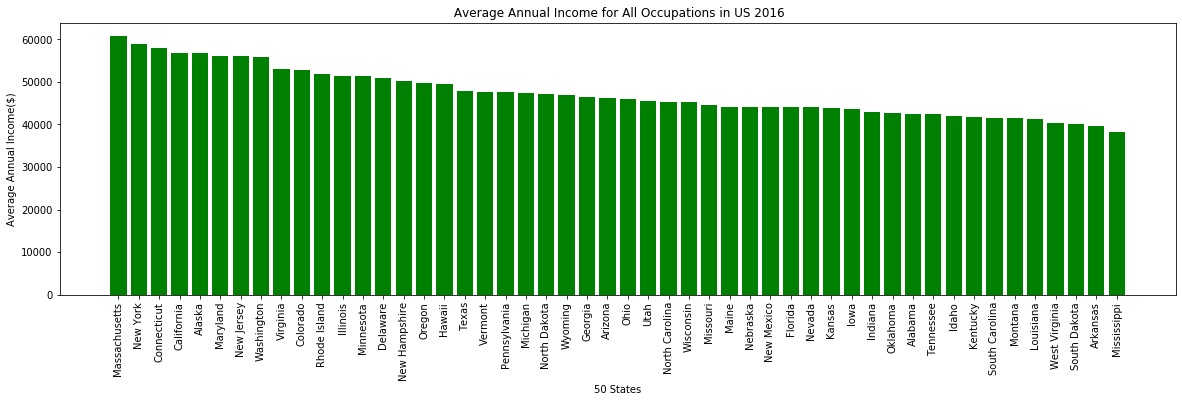

In [19]:
x = np.arange(50)
plt.figure(figsize=(20, 5))
plt.bar(x, State_avg_income[" a_mean "], color = "green", alpha = 1)
plt.xlabel("50 States")
plt.ylabel("Average Annual Income($)")
plt.title(" Average Annual Income for All Occupations in US 2016")
plt.xticks(x, State_avg_income["area_title"], rotation = 90)
plt.show()

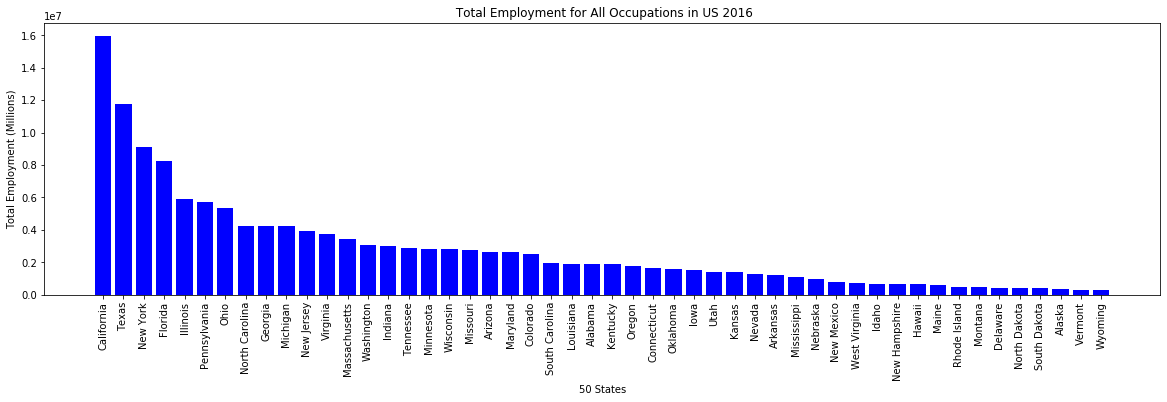

In [24]:

plt.figure(figsize=(20, 5))
plt.bar(x, State_employment_rate["tot_emp"], color ="blue", alpha = 1)
plt.xlabel("50 States")
plt.ylabel("Total Employment (Millions)")
plt.title(" Total Employment for All Occupations in US 2016")
plt.xticks(x, State_employment_rate["area_title"], rotation = 90)
plt.show()